# SPAM-HAM

## Import Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

import sys
reload(sys)
sys.setdefaultencoding("latin-1")

## Reading the Data

In [2]:
data=pd.read_csv('spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Columns Unnamed: 2, Unnamed: 3 and Unnamed: 4 have more NaN's than information, therefore they are not useful for classification

In [3]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data=data.rename(columns={'v1':'label','v2':'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Convert Labels to numerical values
data['label_nums']=data.label.map({'ham':0, 'spam':1})
data.head()

,label,text,label_nums
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Remove StopWords

In [5]:
type(data)
stop = stopwords.words('english')
data['text_nostopwords']=data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,label,text,label_nums,text_nostopwords
0,ham,"Go until jurong point, crazy.. Available only ...",0,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,U dun say early hor... U c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I don't think goes usf, lives around though"


## Splitting of Train and Test Data

In [6]:
train_data,test_data,train_label,test_label=train_test_split(data['text_nostopwords'],data['label'],test_size=0.3)
train_label.head()

2148     ham
906     spam
3967     ham
2034     ham
553      ham
Name: label, dtype: object

## TF-IDF Transformation

In [7]:
vect=TfidfVectorizer(encoding='latin-1')
vect.fit(train_data)
trans_traindata=vect.transform(train_data)
trans_testdata=vect.transform(test_data)

## Machine Learning Models

## 1.Naive Bayes Based Models

Naive Bayes is an effective method for text classification, however Multinomial and Bernoulli Naive bayes are more effective for discrete data as we have here

### Naive Bayes

In [8]:
gnb=GaussianNB()
gnb.fit(trans_traindata.toarray(),train_label)

GaussianNB(priors=None)

In [9]:
prediction=dict()
prediction["Naive Bayes"]=gnb.predict(trans_testdata.toarray())

In [10]:
accuracy_score(test_label,prediction["Naive Bayes"])


0.90729665071770338

### Multinomial Naive Bayes

In [11]:
mnb=MultinomialNB()
mnb.fit(trans_traindata.toarray(),train_label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
prediction["MultinomialNB"]=mnb.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["MultinomialNB"])

0.96052631578947367

### Bernoulli Naive Bayes

In [13]:
bnb=BernoulliNB()
bnb.fit(trans_traindata.toarray(),train_label)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [14]:
prediction["BernoulliNB"]=bnb.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["BernoulliNB"])

0.97488038277511957

## 2. Support Vector Machine

In [15]:
lsvc=LinearSVC()
lsvc.fit(trans_traindata.toarray(),train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
prediction["LSVC"]=lsvc.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["LSVC"])

0.9856459330143541

## 3. Linear Discriminant Analysis

In [17]:
lda=LinearDiscriminantAnalysis()
lda.fit(trans_traindata.toarray(),train_label)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [18]:
prediction["LDA"]=lda.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["LDA"])

0.97308612440191389

## 4. Decision Trees

In [19]:
dt=DecisionTreeClassifier()
dt.fit(trans_traindata.toarray(),train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
prediction["DT"]=dt.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["DT"])

0.96232057416267947

## 5. Logistic Regression

In [21]:
lr=LogisticRegression()
lr.fit(trans_traindata.toarray(),train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
prediction["LR"]=lr.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["LR"])

0.96471291866028708

## 6. Ensemble Classifier

### Random Forest Classifier

In [23]:
rf=RandomForestClassifier()
rf.fit(trans_traindata.toarray(),train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
prediction["RF"]=rf.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["RF"])

0.97248803827751196

### Ada Boost Classifier

In [25]:
ada=AdaBoostClassifier()
ada.fit(trans_traindata.toarray(),train_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [26]:
prediction["ADA"]=ada.predict(trans_testdata.toarray())
accuracy_score(test_label,prediction["ADA"])

0.97607655502392343

# Visualisation

In [46]:
# For Visualisation
eval_mat={'NB':0,'MNB':0,'BNB':0,'SVM':0,'LDA':0,'DT':0,'LR':0,'RF':0,'AB':0}
eval_mat['NB']=((accuracy_score(test_label,prediction["Naive Bayes"])))*100
eval_mat['SVM']=(accuracy_score(test_label,prediction["LSVC"]))*100
eval_mat['MNB']=(accuracy_score(test_label,prediction["MultinomialNB"]))*100
eval_mat['BNB']=(accuracy_score(test_label,prediction["BernoulliNB"]))*100
eval_mat['LDA']=(accuracy_score(test_label,prediction["LDA"]))*100
eval_mat['LR']=(accuracy_score(test_label,prediction["LR"]))*100
eval_mat['DT']=(accuracy_score(test_label,prediction["DT"]))*100
eval_mat['AB']=(accuracy_score(test_label,prediction["ADA"]))*100
eval_mat['RF']=(accuracy_score(test_label,prediction["RF"]))*100

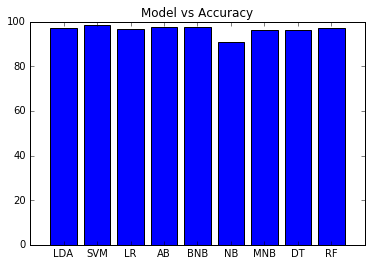

In [50]:
plt.bar(range(len(eval_mat)),eval_mat.values(),align='center')
plt.xticks(range(len(eval_mat)),eval_mat.keys())
plt.title('Model vs Accuracy')
plt.show()

We can clearly see that linear SVM works better for such type of data, with a classification accuracy of over 98.5%